<a href="https://colab.research.google.com/github/reenarao00/Data-Science./blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
import pickle as pk

Data Collection and Processing

In [2]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('car data.csv')

In [3]:
# inspecting the first 5 rows of the dataframe
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2017,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2018,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2022,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car_dataset = car_dataset[car_dataset["Car_Name"] != "ritz"]


In [5]:
# checking the number of rows and columns
car_dataset.shape

(297, 9)

In [6]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 1 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       297 non-null    object 
 1   Year           297 non-null    int64  
 2   Selling_Price  297 non-null    float64
 3   Present_Price  297 non-null    float64
 4   Kms_Driven     297 non-null    int64  
 5   Fuel_Type      297 non-null    object 
 6   Seller_Type    297 non-null    object 
 7   Transmission   297 non-null    object 
 8   Owner          297 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 23.2+ KB


In [7]:
# checking the number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
car_dataset.shape

(297, 9)

In [9]:
car_dataset.drop_duplicates(inplace=True)

In [10]:
car_dataset.shape

(295, 9)

In [11]:
car_dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
1,sx4,2018,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2022,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [12]:
for col in car_dataset.columns:
    print('Unique values of ' + col)
    print(car_dataset[col].unique())
    print("======================")

Unique values of Car_Name
['sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross' 'alto 800'
 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni' 'fortuner'
 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva' 'corolla'
 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Stree

In [13]:
def get_brand_name(car_name):
    car_name = car_name.split(' ')[0]
    return car_name.strip() 

In [14]:
get_brand_name('vitara brezza')   

'vitara'

In [15]:
car_dataset['Car_Name'] =car_dataset['Car_Name'].apply(get_brand_name)

In [16]:
car_dataset['Car_Name'].unique()

array(['sx4', 'ciaz', 'wagon', 'swift', 'vitara', 's', 'alto', 'ertiga',
       'dzire', 'ignis', '800', 'baleno', 'omni', 'fortuner', 'innova',
       'corolla', 'etios', 'camry', 'land', 'Royal', 'UM', 'KTM', 'Bajaj',
       'Hyosung', 'Mahindra', 'Honda', 'Yamaha', 'TVS', 'Hero', 'Activa',
       'Suzuki', 'i20', 'grand', 'i10', 'eon', 'xcent', 'elantra',
       'creta', 'verna', 'city', 'brio', 'amaze', 'jazz'], dtype=object)

In [17]:
def clean_data(value):
    value = value.split(' ')[0]
    value = value.strip()
    if value == '':
        value = 0
    return float(value)

In [18]:
get_brand_name('ritz')

'ritz'

In [19]:
car_dataset['Car_Name'] = car_dataset['Car_Name'].apply(get_brand_name)

In [20]:
car_dataset['Car_Name'].unique()

array(['sx4', 'ciaz', 'wagon', 'swift', 'vitara', 's', 'alto', 'ertiga',
       'dzire', 'ignis', '800', 'baleno', 'omni', 'fortuner', 'innova',
       'corolla', 'etios', 'camry', 'land', 'Royal', 'UM', 'KTM', 'Bajaj',
       'Hyosung', 'Mahindra', 'Honda', 'Yamaha', 'TVS', 'Hero', 'Activa',
       'Suzuki', 'i20', 'grand', 'i10', 'eon', 'xcent', 'elantra',
       'creta', 'verna', 'city', 'brio', 'amaze', 'jazz'], dtype=object)

In [21]:
car_dataset['Car_Name'].replace(['sx4', 'ciaz', 'wagon', 'swift', 'vitara', 's', 'alto', 'ertiga',
       'dzire', 'ignis', '800', 'baleno', 'omni', 'fortuner', 'innova',
       'corolla', 'etios', 'camry', 'land', 'Royal', 'UM', 'KTM', 'Bajaj',
       'Hyosung', 'Mahindra', 'Honda', 'Yamaha', 'TVS', 'Hero', 'Activa',
       'Suzuki', 'i20', 'grand', 'i10', 'eon', 'xcent', 'elantra',
       'creta', 'verna', 'city', 'brio', 'amaze', 'jazz'],
                          [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43]
                          ,inplace=True)

C:\Users\bhara\AppData\Local\Temp\ipykernel_1700\3668975064.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_dataset['Car_Name'].replace(['sx4', 'ciaz', 'wagon', 'swift', 'vitara', 's', 'alto', 'ertiga',
C:\Users\bhara\AppData\Local\Temp\ipykernel_1700\3668975064.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_

In [22]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 295 entries, 1 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       295 non-null    int64  
 1   Year           295 non-null    int64  
 2   Selling_Price  295 non-null    float64
 3   Present_Price  295 non-null    float64
 4   Kms_Driven     295 non-null    int64  
 5   Fuel_Type      295 non-null    object 
 6   Seller_Type    295 non-null    object 
 7   Transmission   295 non-null    object 
 8   Owner          295 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 23.0+ KB


In [23]:
# checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    236
Diesel     57
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        189
Individual    106
Name: count, dtype: int64
Transmission
Manual       256
Automatic     39
Name: count, dtype: int64


In [24]:
# encoding "Fuel_Type" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

C:\Users\bhara\AppData\Local\Temp\ipykernel_1700\336345893.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
C:\Users\bhara\AppData\Local\Temp\ipykernel_1700\336345893.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
C:\Users\bhara\AppData\Local\Temp\ipykernel_1700\336345893.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a fut

In [25]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
1,1,2018,4.75,9.54,43000,1,0,0,0
2,2,2022,7.25,9.85,6900,0,0,0,0
3,3,2011,2.85,4.15,5200,0,0,0,0
4,4,2014,4.60,6.87,42450,1,0,0,0
5,5,2018,9.25,9.83,2071,1,0,0,0


In [26]:
car_dataset.reset_index(inplace=True)

In [27]:
car_dataset

,index,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,1,1,2018,4.75,9.54,43000,1,0,0,0
1,2,2,2022,7.25,9.85,6900,0,0,0,0
2,3,3,2011,2.85,4.15,5200,0,0,0,0
3,4,4,2014,4.60,6.87,42450,1,0,0,0
4,5,5,2018,9.25,9.83,2071,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
290,296,40,2016,9.50,11.60,33988,1,0,0,0
291,297,41,2015,4.00,5.90,60000,0,0,0,0
292,298,40,2009,3.35,11.00,87934,0,0,0,0
293,299,40,2017,11.50,12.50,9000,1,0,0,0


In [28]:
car_dataset.drop(columns=['index'], inplace=True)

In [29]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [30]:
input_data = car_dataset.drop(columns=['Selling_Price'])
output_data =car_dataset['Selling_Price']

In [31]:
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2)

In [32]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [33]:
lin_reg_model.fit(x_train,y_train)

LinearRegression()

In [34]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(x_train)

In [35]:
# R squared Error
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8681106787523695


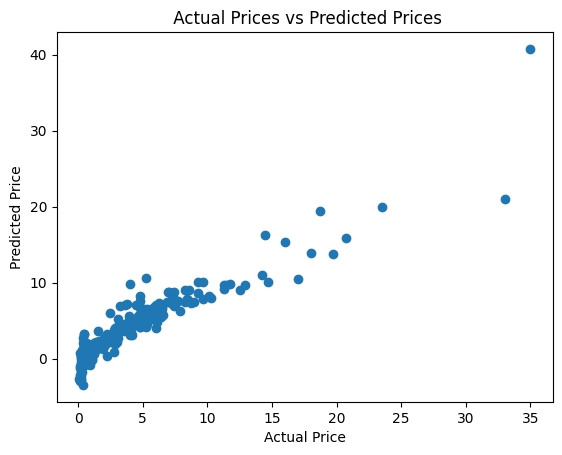

In [36]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [37]:
# prediction on Training data
test_data_prediction = lin_reg_model.predict(x_test)

In [38]:
# R squared Error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8951241123693465


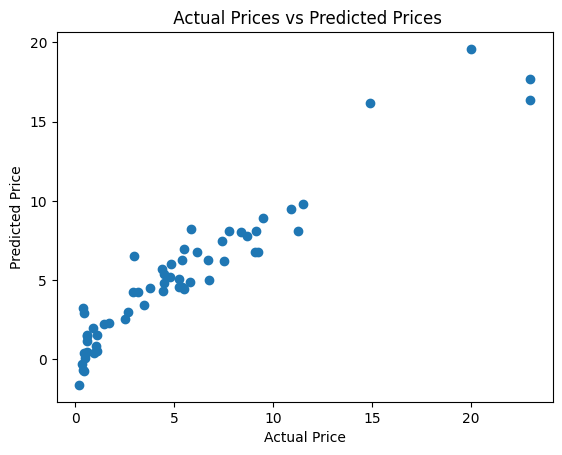

In [39]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [40]:
# loading the linear regression model
lass_reg_model = Lasso()

In [41]:
lass_reg_model.fit(x_train,y_train)

Lasso()

In [42]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(x_train)

In [43]:
# R squared Error
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8297889557023362


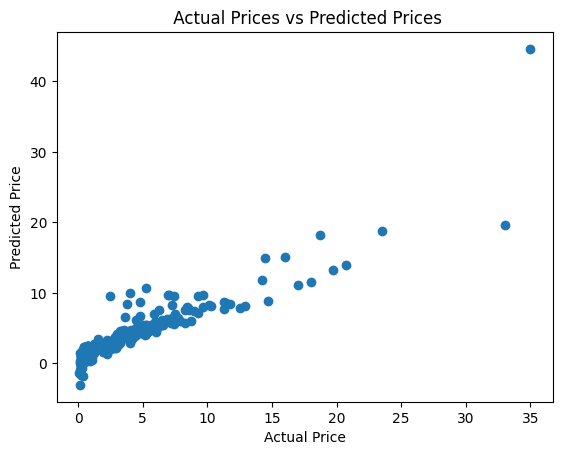

In [44]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [45]:
# prediction on Training data
test_data_prediction = lass_reg_model.predict(x_test)

In [46]:
# R squared Error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8500652451835027


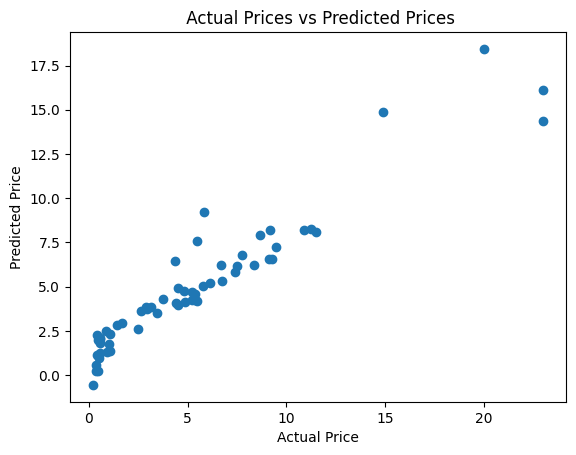

In [47]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [48]:
fuel_counts = car_dataset["Fuel_Type"].value_counts()


In [49]:
plt.figure(figsize=(8, 5))

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

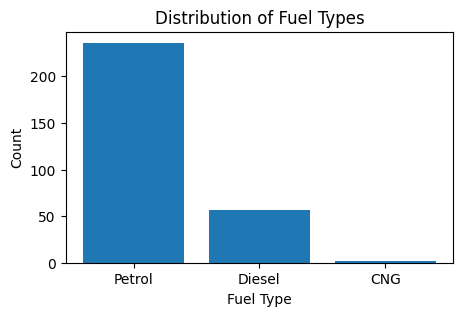

In [50]:
fuel_counts = car_dataset['Fuel_Type'].value_counts()
plt.figure(figsize=(5, 3))
plt.bar(['Petrol', 'Diesel', 'CNG'], fuel_counts)
plt.title('Distribution of Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

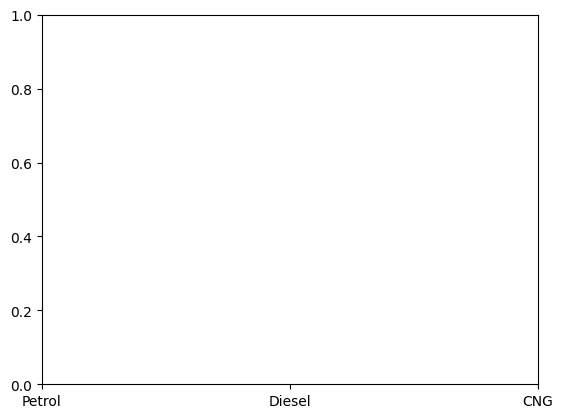

In [51]:
plt.xticks(ticks=[0, 1, 2], labels=['Petrol', 'Diesel', 'CNG'])

plt.show()

In [52]:
pk.dump(lass_reg_model,open('model.pkl','wb'))